In [2]:
import db2 as db

from importlib import reload

def get_dicts_from_df(name_mod):
    
    reload(db)

    db.name_mod = name_mod

    check = db.read_meta_db()

    if type(check[0]) == str:
        print(check)

    db.read_db()

    dict_x, dict_y = db.form_xy()

    dict_x = dict_x[0]
    dict_y = dict_y[0]

    db.add_train_val_test(dict_x, dict_y)

    return dict_x, dict_y

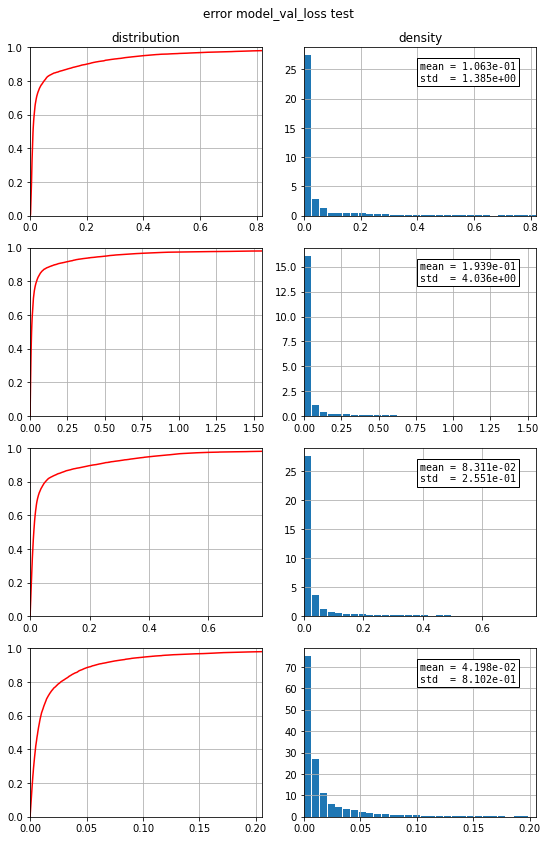

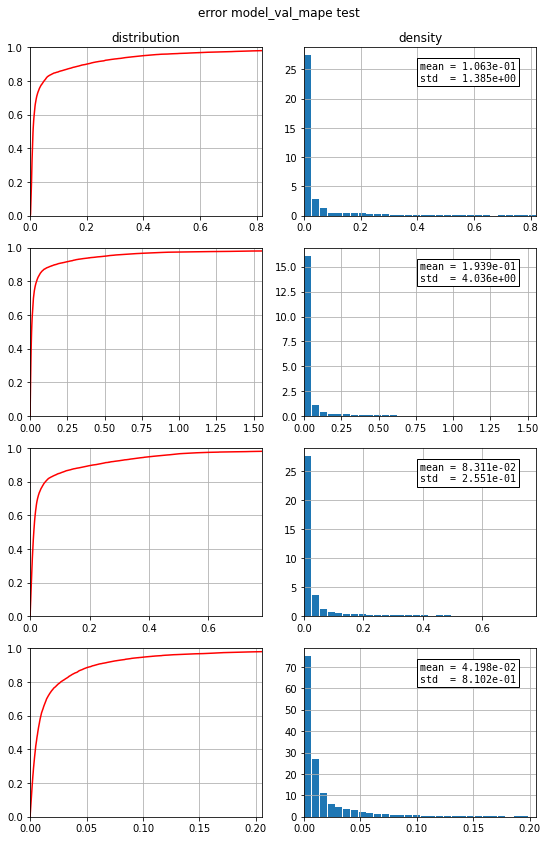

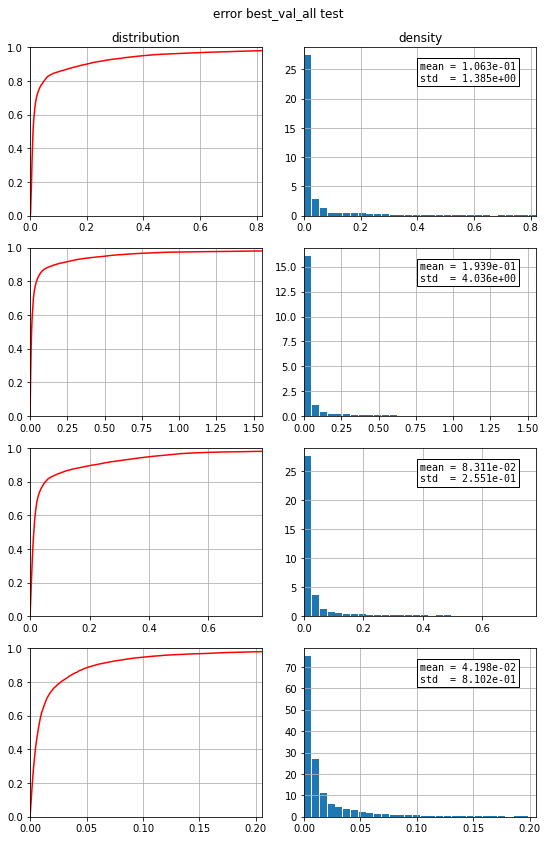

In [4]:

name_mod = 'mod_FF16_0250_MAPE'

db.name_mod = name_mod

dict_x, dict_y = get_dicts_from_df(name_mod)

if False:

    import mdl2 as mdl

    reload(mdl)

    history = mdl.fit(dict_x, dict_y, debug=False, max_epoch_on_debug=1, verbose=0)

    mdl.save_history(history)

    mdl.save_best_val_all(dict_x, dict_y, history)

import vis2 as vis

reload(vis)

vis.vis_losses(dict_x, dict_y, name_dl=name_mod, show=True, in_model=False, only_best_val=True, only_test=True)

# vis.vis_history(name_dl=name_mod, beg=2000, end=-6000, mode='sector_min', nslice=1000, show=True, only_mape=False, only_best_val_all=False)

In [5]:
import tensorflow as tf

print("Available GPUs:", tf.config.list_physical_devices('GPU'))

Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [6]:
with tf.device('/GPU:0'):
    a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
    b = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
    c = a + b
print(c)

tf.Tensor(
[[ 2.  4.  6.]
 [ 8. 10. 12.]], shape=(2, 3), dtype=float32)


In [7]:
import torch

torch.cuda.is_available()

True

In [215]:
tmp = 0.01

print('learning rate |       train |    best val | best v mape')
print('%13.2e |%12.2e |%12.2e |%12.2e' % (tmp, tmp, tmp, tmp))

learning rate |       train |    best val | best v mape
     1.00e-02 |    1.00e-02 |    1.00e-02 |    1.00e-02


In [19]:
import os

print(os.path.basename(r'./'))

In [ ]:
import numpy as np

Am = np.asarray([[1., 1.], [1., 2.]])
b  = np.asarray([1., 1.])